# Shane Gladson

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline

In [4]:
def square_cost(x, k):
    return (x + k) ** 2

def exp_cost(x, k):
    return np.exp(-k*x*x)

def log_grad_norm(x, mu, sigma_sq):
    dpdmu = (x - mu) / sigma_sq
    dpdsigma_sq = -0.5/sigma_sq + 0.5/(sigma_sq**2) * (x - mu)**2
    return np.array([dpdmu, dpdsigma_sq])

def objective_func(mu, sigma_sq, k, cost_func):
    a = -100
    b = 100
    val = integrate.quad(lambda x: stats.norm.pdf(x, mu, np.sqrt(sigma_sq))*cost_func(x, k), a, b)
    return val[0]

def objective_func_mc(mu, sigma_sq, k, cost_func, rng, sampN=1000):
    x_samps = rng.normal(mu, np.sqrt(sigma_sq), size=(sampN))
    val = np.mean(cost_func(x_samps, k))
    return val

def grad_objective_func(mu, sigma_sq, k, cost_func):
    a = -100
    b = 100
    mean_val = integrate.quad(lambda x: log_grad_norm(x, mu, sigma_sq)[0]*cost_func(x, k)*stats.norm.pdf(x, mu, np.sqrt(sigma_sq)), a, b)[0]
    sigma_sq_val = integrate.quad(lambda x: log_grad_norm(x, mu, sigma_sq)[1]*cost_func(x, k)*stats.norm.pdf(x, mu, np.sqrt(sigma_sq)), a, b)[0]
    return np.array([mean_val, sigma_sq_val])

def grad_objective_func_mc(mu, sigma_sq, k, cost_func, rng, sampN=1000):
    x_samps = rng.normal(mu, np.sqrt(sigma_sq), size=(sampN))
    mean_val = np.mean(log_grad_norm(x_samps, mu, sigma_sq)[0]*cost_func(x_samps, k))
    sigma_sq_val = np.mean(log_grad_norm(x_samps, mu, sigma_sq)[1]*cost_func(x_samps, k))
    return np.array([mean_val, sigma_sq_val])

def grad_objective_func_mc_cv(mu, sigma_sq, k, cost_func, rng, sampN=1000):
    x_samps = rng.normal(mu, np.sqrt(sigma_sq), size=(sampN))
#     total_cost = np.cumsum(cost_func(x_samps, k))
#     beta = total_cost / (np.arange(sampN) + 1)
    beta = np.mean(cost_func(x_samps, k))
    mean_val = np.mean(log_grad_norm(x_samps, mu, sigma_sq)[0]*(cost_func(x_samps, k)-beta))
    sigma_sq_val = np.mean(log_grad_norm(x_samps, mu, sigma_sq)[1]*(cost_func(x_samps, k)-beta))
    return np.array([mean_val, sigma_sq_val])

In [6]:
length = 200
mu = 1
sigma_sq = 1
k = np.linspace(0, 3, length)
obj_func_val = np.zeros(shape=length)
obj_func_val_mc = np.zeros(shape=length)
obj_func_grad = np.zeros(shape=(length, 2))
obj_func_grad_mc = np.zeros(shape=(length, 2))
obj_func_grad_mc_cv = np.zeros(shape=(length, 2))
rng = np.random.default_rng(10)
for i in range(length):
    obj_func_val[i] = objective_func(mu, sigma_sq, k[i], square_cost)
rng = np.random.default_rng(10)
for i in range(length):
    obj_func_val_mc[i] = objective_func_mc(mu, sigma_sq, k[i], square_cost, rng)
rng = np.random.default_rng(10)
for i in range(length):
    obj_func_grad[i] = grad_objective_func(mu, sigma_sq, k[i], square_cost)
rng = np.random.default_rng(10)
for i in range(length):
    obj_func_grad_mc[i] = grad_objective_func_mc(mu, sigma_sq, k[i], square_cost, rng)
rng = np.random.default_rng(10)
for i in range(length):
    obj_func_grad_mc_cv[i] = grad_objective_func_mc_cv(mu, sigma_sq, k[i], square_cost, rng)
#     print(objective_func(0, 1, k[i], square_cost))

Text(0.5, 1.0, 'MC Estimation of $\\mathcal{F}$')

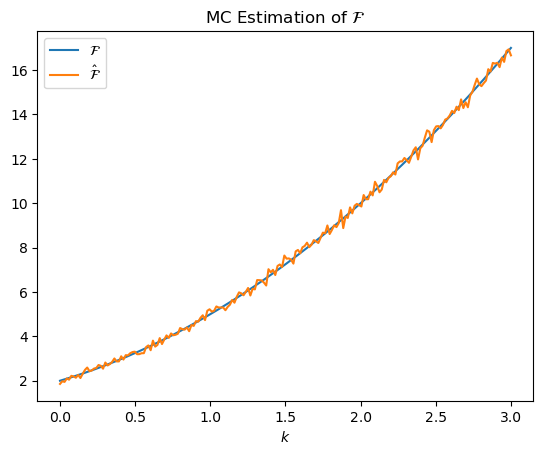

In [7]:
plt.plot(k, obj_func_val, label=r'$\mathcal{F}$')
plt.plot(k, obj_func_val_mc, label=r'$\hat{\mathcal{F}}$')
plt.legend()
plt.xlabel(r'$k$')
plt.title(r'MC Estimation of $\mathcal{F}$')
# plt.savefig('mcestF.pdf', dpi=600)

0.1642187028291493 0.08939401846240527
0.5443595456688601


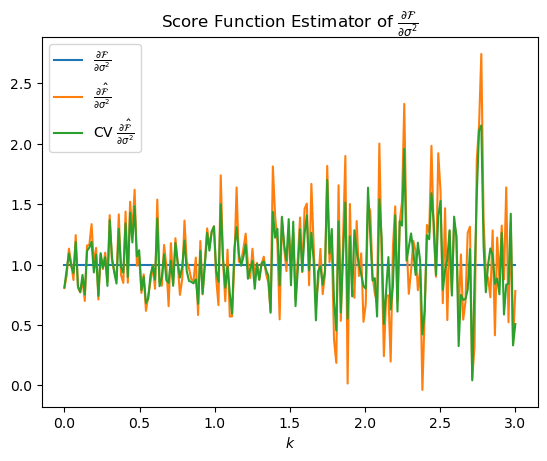

In [8]:
plt.plot(k, obj_func_grad[:,1], label=r'$\frac{\partial \mathcal{F}}{\partial \sigma^2}$')
plt.plot(k, obj_func_grad_mc[:,1], label=r'$\hat{\frac{\partial \mathcal{F}}{\partial \sigma^2}}$')
plt.plot(k, obj_func_grad_mc_cv[:,1], label=r'CV $\hat{\frac{\partial \mathcal{F}}{\partial \sigma^2}}$')
plt.legend()
plt.xlabel(r'$k$')
# plt.yscale('log')
plt.title(r'Score Function Estimator of $\frac{\partial \mathcal{F}}{\partial \sigma^2}$')
# plt.savefig('scoregradsigmacv.pdf', dpi=600)
mse_score = np.mean((obj_func_grad[:,1]-obj_func_grad_mc[:,1])**2)
mse_cv = np.mean((obj_func_grad[:,1]-obj_func_grad_mc_cv[:,1])**2)
# plt.yscale('log')
# plt.xlim(0.5, 3)
# Compute MSE and ratio
print(mse_score, mse_cv)
print(mse_cv / mse_score)

0.17235456670285484 0.0678002776852709
0.39337674064744044


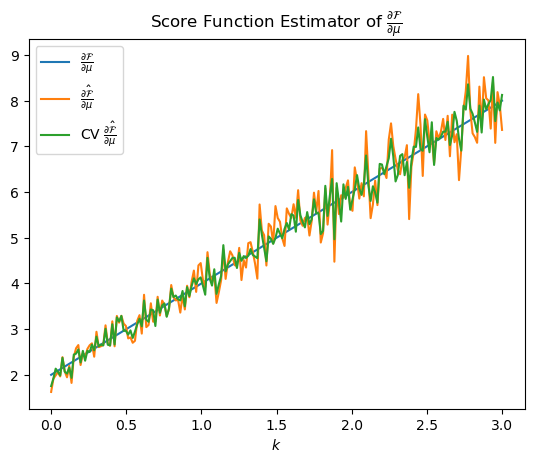

In [9]:
plt.plot(k, obj_func_grad[:,0], label=r'$\frac{\partial \mathcal{F}}{\partial \mu}$')
plt.plot(k, obj_func_grad_mc[:,0], label=r'$\hat{\frac{\partial \mathcal{F}}{\partial \mu}}$')
plt.plot(k, obj_func_grad_mc_cv[:,0], label=r'CV $\hat{\frac{\partial \mathcal{F}}{\partial \mu}}$')
plt.legend()
plt.xlabel(r'$k$')
plt.title(r'Score Function Estimator of $\frac{\partial \mathcal{F}}{\partial \mu}$')
# plt.savefig('scoregradmucv.pdf', dpi=600)
mse_score = np.mean((obj_func_grad[:,0]-obj_func_grad_mc[:,0])**2)
mse_cv = np.mean((obj_func_grad[:,0]-obj_func_grad_mc_cv[:,0])**2)
# plt.yscale('symlog')
# Compute MSE and ratio
print(mse_score, mse_cv)
print(mse_cv / mse_score)

Measure-Valued Gradient

0.17235456670285484 0.006487545628677577
0.037640694718941374


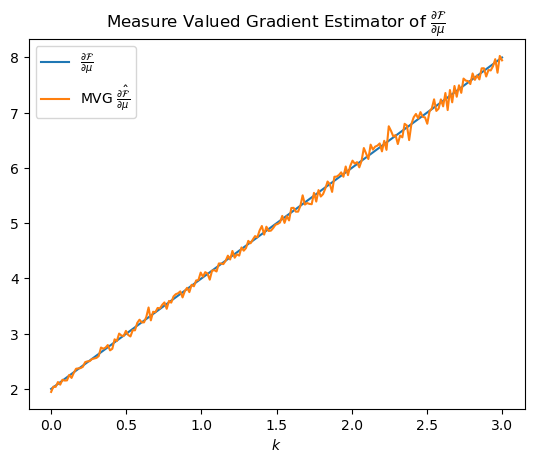

In [11]:
from scipy.stats import maxwell

def grad_objective_func_mv(mu, sigma_sq, k, cost_func, rng, sampN=1000):
    c_theta = 1 / np.sqrt(sigma_sq*2*np.pi)
    # Generate Weibull samples
    W_samps = np.sqrt(-2*np.log(rng.random(size=sampN)))
    pos_measure_samps = mu + np.sqrt(sigma_sq) * W_samps
#     W_samps = np.sqrt(-2*np.log(rng.random(size=sampN)))
    neg_measure_samps = mu - np.sqrt(sigma_sq) * W_samps
    grad_mu = c_theta * (np.mean(cost_func(pos_measure_samps, k)) - np.mean(cost_func(neg_measure_samps, k)))
    c_theta = 1 / np.sqrt(sigma_sq)
    pos_measure_samps = maxwell.ppf(np.random.random(size=sampN), loc=mu, scale=sigma_sq)
    neg_measure_samps = rng.normal(loc=mu, scale=np.sqrt(sigma_sq), size=sampN)
    grad_sigma = c_theta * (np.mean(cost_func(pos_measure_samps, k)) - np.mean(cost_func(neg_measure_samps, k)))
    return np.array([grad_mu, grad_sigma])

def grad_log_norm_sigma(mu, sigma_sq, k, cost_func):
    a = -100
    b = 100
    sigma = np.sqrt(sigma_sq)
    sigma_sq_val = integrate.quad(lambda x: (-0.5/sigma + (x-mu)**2/(2*sigma**3))*cost_func(x, k)*stats.norm.pdf(x, mu, np.sqrt(sigma_sq)), a, b)[0]
    return np.array([sigma_sq_val])[0]

obj_func_grad_mvg = np.zeros(shape=(length, 2))
mu = 1
sigma_sq = 2
rng = np.random.default_rng(seed=0)
for i in range(length):
    obj_func_grad_mvg[i] = grad_objective_func_mv(mu, sigma_sq, k[i], square_cost, rng)
    
plt.plot(k, obj_func_grad[:,0], label=r'$\frac{\partial \mathcal{F}}{\partial \mu}$')
plt.plot(k, obj_func_grad_mvg[:,0], label=r'MVG $\hat{\frac{\partial \mathcal{F}}{\partial \mu}}$')
plt.legend()
plt.xlabel(r'$k$')
plt.title(r'Measure Valued Gradient Estimator of $\frac{\partial \mathcal{F}}{\partial \mu}$')
# plt.savefig('scoregradmumvg.pdf', dpi=600)
mse_mvg = np.mean((obj_func_grad[:,0]-obj_func_grad_mvg[:,0])**2)
print(mse_score, mse_mvg)
print(mse_mvg / mse_score)

0.17235456670285484 316.2702762904422
1834.9979483613158


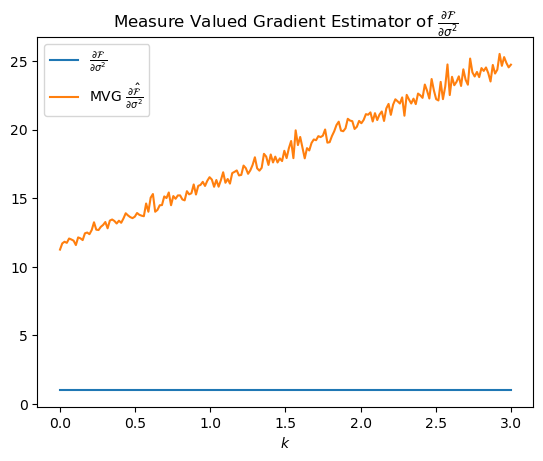

In [12]:
# grad_sigma = np.zeros(shape=(length))
# for i in range(length):
#     grad_sigma[i] = grad_log_norm_sigma(mu, sigma_sq, k[i], square_cost)
plt.plot(k, obj_func_grad[:,1], label=r'$\frac{\partial \mathcal{F}}{\partial \sigma^2}$')
plt.plot(k, obj_func_grad_mvg[:,1], label=r'MVG $\hat{\frac{\partial \mathcal{F}}{\partial \sigma^2}}$')
plt.legend()
plt.xlabel(r'$k$')
plt.title(r'Measure Valued Gradient Estimator of $\frac{\partial \mathcal{F}}{\partial \sigma^2}$')
# plt.savefig('scoregradsigmamvg.pdf', dpi=600)
mse_mvg = np.mean((obj_func_grad[:,1]-obj_func_grad_mvg[:,1])**2)
print(mse_score, mse_mvg)
print(mse_mvg / mse_score)

Pathwise Gradient

0.17235456670285484 0.00839702887999349
0.04871950329271086


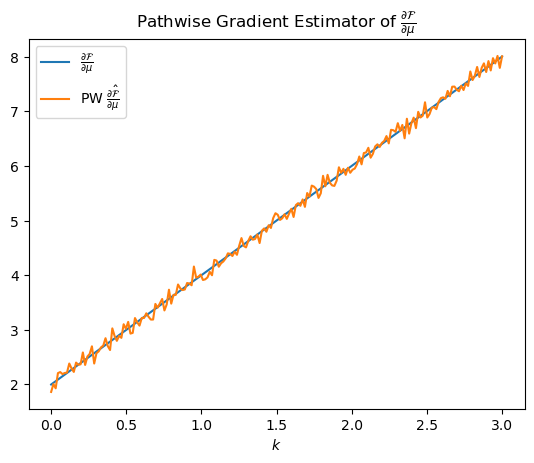

In [14]:
def grad_objective_func_pw(mu, sigma_sq, k, cost_func, rng, sampN=1000):
    epsilon = rng.normal(size=sampN)
#     transformed = ((epsilon + mu)/np.sqrt(sigma_sq) - k) ** 2
    grad_mu = np.mean(2 * (np.sqrt(sigma_sq)*epsilon + mu + k))
    grad_var = np.mean(epsilon / np.sqrt(sigma_sq) * (np.sqrt(sigma_sq)*epsilon + mu + k))
    return np.array([grad_mu, grad_var])

obj_func_grad_pw = np.zeros(shape=(length, 2))
rng = np.random.default_rng(seed=0)
for i in range(length):
    obj_func_grad_pw[i] = grad_objective_func_pw(mu, sigma_sq, k[i], square_cost, rng)
    
plt.plot(k, obj_func_grad[:,0], label=r'$\frac{\partial \mathcal{F}}{\partial \mu}$')
plt.plot(k, obj_func_grad_pw[:,0], label=r'PW $\hat{\frac{\partial \mathcal{F}}{\partial \mu}}$')
plt.legend()
plt.xlabel(r'$k$')
plt.title(r'Pathwise Gradient Estimator of $\frac{\partial \mathcal{F}}{\partial \mu}$')
# plt.savefig('scoregradmupw.pdf', dpi=600)
mse_pw = np.mean((obj_func_grad[:,0]-obj_func_grad_pw[:,0])**2)
print(mse_score, mse_pw)
print(mse_pw / mse_score)

0.17235456670285484 0.005260960827600247
0.030524058214658874


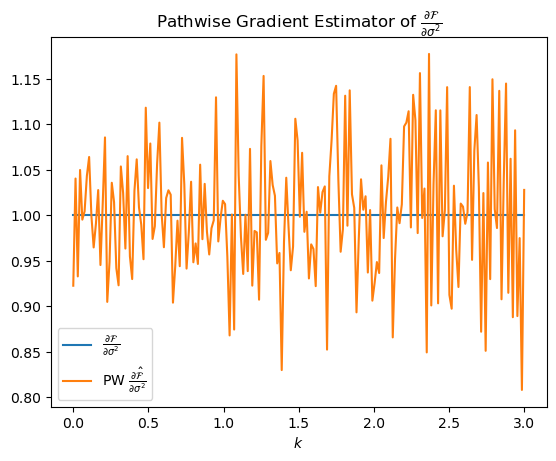

In [15]:
plt.plot(k, obj_func_grad[:,1], label=r'$\frac{\partial \mathcal{F}}{\partial \sigma^2}$')
plt.plot(k, obj_func_grad_pw[:,1], label=r'PW $\hat{\frac{\partial \mathcal{F}}{\partial \sigma^2}}$')
plt.legend()
plt.xlabel(r'$k$')
plt.title(r'Pathwise Gradient Estimator of $\frac{\partial \mathcal{F}}{\partial \sigma^2}$')
# plt.savefig('scoregradsigmapw.pdf', dpi=600)
mse_pw = np.mean((obj_func_grad[:,1]-obj_func_grad_pw[:,1])**2)
print(mse_score, mse_pw)
print(mse_pw / mse_score)